<a href="https://colab.research.google.com/github/Manishpatil7975/AIML_ASSIGNMENTS/blob/main/assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('/content/Credit.csv')
print("First 5 rows:\n", data.head())
print("\nDataset info:\n")
print(data.info())

First 5 rows:
     Income  Limit  Rating  Cards  Age  Education  Own Student Married Region  \
0   14.891   3606     283      2   34         11   No      No     Yes  South   
1  106.025   6645     483      3   82         15  Yes     Yes     Yes   West   
2  104.593   7075     514      4   71         11   No      No      No   West   
3  148.924   9504     681      3   36         11  Yes      No      No   West   
4   55.882   4897     357      2   68         16   No      No     Yes  South   

   Balance  
0      333  
1      903  
2      580  
3      964  
4      331  

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-n

In [3]:
# Drop ID column if present
if 'ID' in data.columns:
    data = data.drop('ID', axis=1)

# Encode categorical variables if any
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# Check for nulls
print("\nMissing values:\n", data.isnull().sum())



Missing values:
 Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Region       0
Balance      0
dtype: int64


In [5]:
# Define features and target (assume target is 'default' or similar)
# target_col = 'default' if 'default' in data.columns else data.columns[-1]
# Assuming 'Student' is the target for binary classification and renaming it to 'default'
data = data.rename(columns={'Student': 'default'})
target_col = 'default'
X = data.drop(target_col, axis=1)
y = data[target_col]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.62      0.76        13

    accuracy                           0.96       120
   macro avg       0.98      0.81      0.87       120
weighted avg       0.96      0.96      0.95       120

Accuracy: 0.9583333333333334
Precision: 1.0
Recall: 0.6153846153846154
F1 Score: 0.7619047619047619


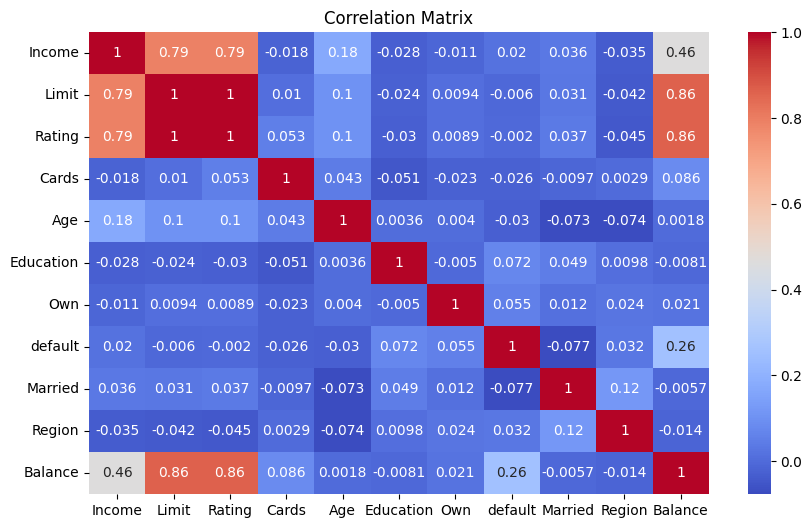

In [6]:
# 1. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

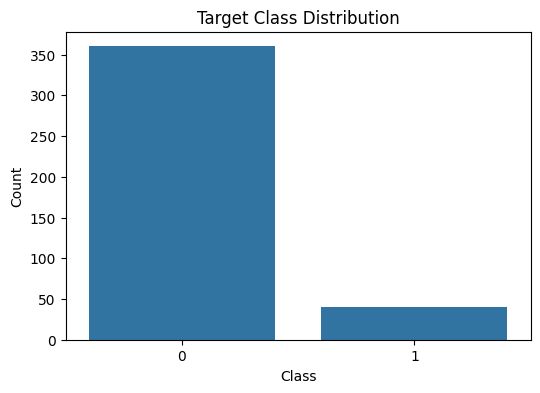

In [7]:
# 2. Distribution of Target
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

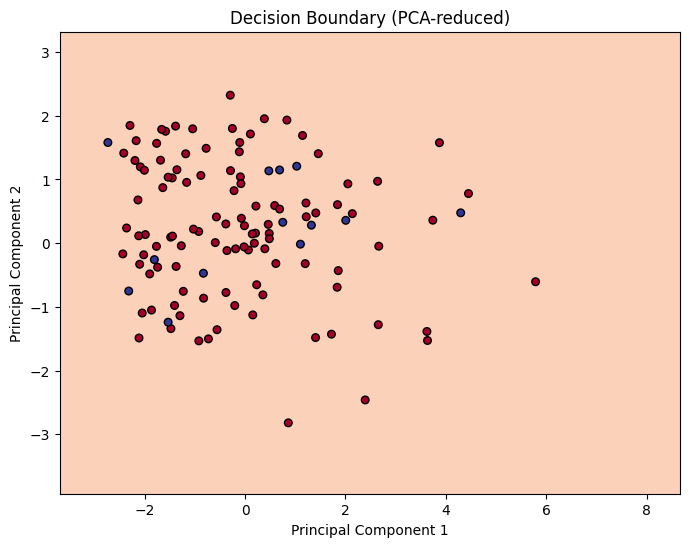

In [8]:
# 3. Decision Boundary Visualization (Reduce to 2D using PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

model_2d = LogisticRegression()
model_2d.fit(X_train_2d, y_train)

# Create mesh to plot decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, s=30, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title("Decision Boundary (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()